Data Normalization snippets:
Given a mock table of ages and salaries, open table as a panda df and create new columns with normalized data, 
using Simple Feature Scaling, Min/Max and Z-Score (standard score).

In [2]:
file = open("/Users/luci/Desktop/age_salary.csv")
print(file.read())

ï»¿age,salary
20,20000
22,22000
35,100000
42,200000
50,50000
29,80000
31,33000
37,24000
46,36000
34,92000
21,23000
26,19000
36,25000
41,28000
49,32000
30,20000



In [3]:
import pandas as pd

df = pd.read_csv("/Users/luci/Desktop/age_salary.csv")
print(df)

    age  salary
0    20   20000
1    22   22000
2    35  100000
3    42  200000
4    50   50000
5    29   80000
6    31   33000
7    37   24000
8    46   36000
9    34   92000
10   21   23000
11   26   19000
12   36   25000
13   41   28000
14   49   32000
15   30   20000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     16 non-null     int64
 1   salary  16 non-null     int64
dtypes: int64(2)
memory usage: 384.0 bytes


In [5]:
list(df.columns)

['age', 'salary']

In [6]:
df.describe()

,age,salary
count,16.00000,16.000000
mean,34.31250,50250.000000
std,9.56883,47979.856885
min,20.00000,19000.000000
25%,28.25000,22750.000000
50%,34.50000,30000.000000
75%,41.25000,57500.000000
max,50.00000,200000.000000


Data Normalization: put different variables casted in different ranges into ranges of similar value, so they will have similar impact when in linear regression

1. Simple feature scaling: new value = old value / max value

In [7]:
sfs_df = df.copy()  #Firstly, create a copy of the df with the prefix sfs_, standing for simple feature scalling
print(sfs_df) # Print copy to see if everything's copied just fine

    age  salary
0    20   20000
1    22   22000
2    35  100000
3    42  200000
4    50   50000
5    29   80000
6    31   33000
7    37   24000
8    46   36000
9    34   92000
10   21   23000
11   26   19000
12   36   25000
13   41   28000
14   49   32000
15   30   20000


In [8]:
#create neu columns age_normalized and salary_normalized using the sfs formula:

sfs_df["age_normalized"] = sfs_df["age"]/sfs_df["age"].max() 
sfs_df["salary_normalized"] = sfs_df["salary"]/sfs_df["salary"].max()
print(sfs_df)   #Print df with the 2 new columns. The 2 new colums must have values that range from 0 to 1.

    age  salary  age_normalized  salary_normalized
0    20   20000            0.40              0.100
1    22   22000            0.44              0.110
2    35  100000            0.70              0.500
3    42  200000            0.84              1.000
4    50   50000            1.00              0.250
5    29   80000            0.58              0.400
6    31   33000            0.62              0.165
7    37   24000            0.74              0.120
8    46   36000            0.92              0.180
9    34   92000            0.68              0.460
10   21   23000            0.42              0.115
11   26   19000            0.52              0.095
12   36   25000            0.72              0.125
13   41   28000            0.82              0.140
14   49   32000            0.98              0.160
15   30   20000            0.60              0.100


In [9]:
#get rid of the old columns so we may run .describe() again
sfs_df.drop(['age', 'salary'], axis=1, inplace = True)
print(sfs_df)

    age_normalized  salary_normalized
0             0.40              0.100
1             0.44              0.110
2             0.70              0.500
3             0.84              1.000
4             1.00              0.250
5             0.58              0.400
6             0.62              0.165
7             0.74              0.120
8             0.92              0.180
9             0.68              0.460
10            0.42              0.115
11            0.52              0.095
12            0.72              0.125
13            0.82              0.140
14            0.98              0.160
15            0.60              0.100


In [10]:
#Compare sfs_df.describe() vs original df.describe()

sfs_df.describe(), df.describe()

(       age_normalized  salary_normalized
 count       16.000000          16.000000
 mean         0.686250           0.251250
 std          0.191377           0.239899
 min          0.400000           0.095000
 25%          0.565000           0.113750
 50%          0.690000           0.150000
 75%          0.825000           0.287500
 max          1.000000           1.000000,
             age         salary
 count  16.00000      16.000000
 mean   34.31250   50250.000000
 std     9.56883   47979.856885
 min    20.00000   19000.000000
 25%    28.25000   22750.000000
 50%    34.50000   30000.000000
 75%    41.25000   57500.000000
 max    50.00000  200000.000000)

2. Min/Max = new_value = (old value - min value) / (max value - min value)

In [11]:
minmax_df = df.copy() #Same as above, create a new copy of the dataframe, and
print(minmax_df)      # print it to check if it's alright

    age  salary
0    20   20000
1    22   22000
2    35  100000
3    42  200000
4    50   50000
5    29   80000
6    31   33000
7    37   24000
8    46   36000
9    34   92000
10   21   23000
11   26   19000
12   36   25000
13   41   28000
14   49   32000
15   30   20000


In [12]:
#now, create 2 new columns on this df with the normalized values using minmax formula

minmax_df["age_normalized"] = (minmax_df["age"]-minmax_df["age"].min()) / (minmax_df["age"].max()-minmax_df["age"].min())
minmax_df["salary_normalized"] = (minmax_df["salary"]-minmax_df["salary"].min()) / (minmax_df["salary"].max()-minmax_df["salary"].min())

print(minmax_df) #Print to see the results

    age  salary  age_normalized  salary_normalized
0    20   20000        0.000000           0.005525
1    22   22000        0.066667           0.016575
2    35  100000        0.500000           0.447514
3    42  200000        0.733333           1.000000
4    50   50000        1.000000           0.171271
5    29   80000        0.300000           0.337017
6    31   33000        0.366667           0.077348
7    37   24000        0.566667           0.027624
8    46   36000        0.866667           0.093923
9    34   92000        0.466667           0.403315
10   21   23000        0.033333           0.022099
11   26   19000        0.200000           0.000000
12   36   25000        0.533333           0.033149
13   41   28000        0.700000           0.049724
14   49   32000        0.966667           0.071823
15   30   20000        0.333333           0.005525


In [13]:
minmax_df.describe() #Lastly, call the .describe() method to print to compare 

,age,salary,age_normalized,salary_normalized
count,16.00000,16.000000,16.000000,16.000000
mean,34.31250,50250.000000,0.477083,0.172652
std,9.56883,47979.856885,0.318961,0.265082
min,20.00000,19000.000000,0.000000,0.000000
25%,28.25000,22750.000000,0.275000,0.020718
50%,34.50000,30000.000000,0.483333,0.060773
75%,41.25000,57500.000000,0.708333,0.212707
max,50.00000,200000.000000,1.000000,1.000000


3. Z-Score or Standard score: newvalue = old value - mean / standard deviation

In [14]:
z_score_df = df.copy() #Same as above, create a new copy of the dataframe, and
print(z_score_df)      # print it to check if it's alright

    age  salary
0    20   20000
1    22   22000
2    35  100000
3    42  200000
4    50   50000
5    29   80000
6    31   33000
7    37   24000
8    46   36000
9    34   92000
10   21   23000
11   26   19000
12   36   25000
13   41   28000
14   49   32000
15   30   20000


In [15]:
#now, create 2 new columns on this df with the normalized values using z-score formula

z_score_df["age_normalized"] = (z_score_df["age"] - z_score_df["age"].mean()) / z_score_df["age"].std()
z_score_df["salary_normalized"] = (z_score_df["salary"] - z_score_df["salary"].mean()) / z_score_df["salary"].std()
print(z_score_df)

    age  salary  age_normalized  salary_normalized
0    20   20000       -1.495742          -0.630473
1    22   22000       -1.286730          -0.588789
2    35  100000        0.071848           1.036893
3    42  200000        0.803390           3.121101
4    50   50000        1.639438          -0.005211
5    29   80000       -0.555188           0.620052
6    31   33000       -0.346176          -0.359526
7    37   24000        0.280860          -0.547105
8    46   36000        1.221414          -0.297000
9    34   92000       -0.032658           0.870157
10   21   23000       -1.391236          -0.567947
11   26   19000       -0.868706          -0.651315
12   36   25000        0.176354          -0.526263
13   41   28000        0.698884          -0.463736
14   49   32000        1.534932          -0.380368
15   30   20000       -0.450682          -0.630473


In [16]:
z_score_df.describe() #Call the .describe() method to print results

,age,salary,age_normalized,salary_normalized
count,16.00000,16.000000,1.600000e+01,1.600000e+01
mean,34.31250,50250.000000,3.469447e-18,2.775558e-17
std,9.56883,47979.856885,1.000000e+00,1.000000e+00
min,20.00000,19000.000000,-1.495742e+00,-6.513150e-01
25%,28.25000,22750.000000,-6.335676e-01,-5.731572e-01
50%,34.50000,30000.000000,1.959487e-02,-4.220521e-01
75%,41.25000,57500.000000,7.250103e-01,1.511051e-01
max,50.00000,200000.000000,1.639438e+00,3.121101e+00


Binning

In [17]:
import numpy as np

bins = np.linspace(min(df["salary"]), max(df["salary"]),4)
print(bins)

[ 19000.          79333.33333333 139666.66666667 200000.        ]


In [18]:
salaries_grouped = ['lowest_salaries', 'medium_salaries', 'highest_salaries']
df["salaries_binned"] = pd.cut(df["salary"], bins, labels = salaries_grouped, include_lowest = True)
print(df)

    age  salary   salaries_binned
0    20   20000   lowest_salaries
1    22   22000   lowest_salaries
2    35  100000   medium_salaries
3    42  200000  highest_salaries
4    50   50000   lowest_salaries
5    29   80000   medium_salaries
6    31   33000   lowest_salaries
7    37   24000   lowest_salaries
8    46   36000   lowest_salaries
9    34   92000   medium_salaries
10   21   23000   lowest_salaries
11   26   19000   lowest_salaries
12   36   25000   lowest_salaries
13   41   28000   lowest_salaries
14   49   32000   lowest_salaries
15   30   20000   lowest_salaries


In [26]:
ages_grouped = ['20 to 29', '30 to 39', '40 to 49', '50+']
age_bins = [min(df["age"]), 29, 39, 49, max(df["age"])]
df["ages_binned"] = pd.cut(df["age"], age_bins, labels = ages_grouped, include_lowest = True)
print(df)

    age  salary   salaries_binned ages_binned
0    20   20000   lowest_salaries    20 to 29
1    22   22000   lowest_salaries    20 to 29
2    35  100000   medium_salaries    30 to 39
3    42  200000  highest_salaries    40 to 49
4    50   50000   lowest_salaries         50+
5    29   80000   medium_salaries    20 to 29
6    31   33000   lowest_salaries    30 to 39
7    37   24000   lowest_salaries    30 to 39
8    46   36000   lowest_salaries    40 to 49
9    34   92000   medium_salaries    30 to 39
10   21   23000   lowest_salaries    20 to 29
11   26   19000   lowest_salaries    20 to 29
12   36   25000   lowest_salaries    30 to 39
13   41   28000   lowest_salaries    40 to 49
14   49   32000   lowest_salaries    40 to 49
15   30   20000   lowest_salaries    30 to 39


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'salary'}>]], dtype=object)

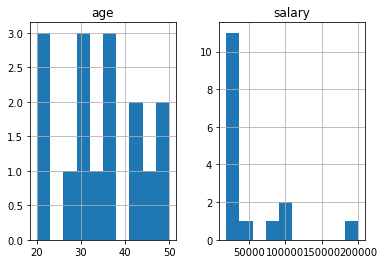

In [27]:
df.hist()